In [1]:
import pandas as pd 
import geopandas as gpd 
import matplotlib.pyplot as plt 

In [2]:
import sys 
sys.path.append('../data/constants')
from nyc import WGS, PROJ_FT 

In [3]:
sys.path.append('../inferencer/yolo')
from shapely_utils import load_with_shapely_geometries

In [4]:
nexar2020_tuesthurs_subset_yolo8x = load_with_shapely_geometries("../data/export/nexar2020_tuesthurs_subset_yolo8x.parquet")

In [5]:
nexar2020_tuesthurs_subset_yolo8x['shapely_boxes'].iloc[0]

[<POLYGON ((462.691 291.978, 462.691 428.328, 278.186 428.328, 278.186 291.97...>,
 <POLYGON ((676.541 261.462, 676.541 455.332, 455.463 455.332, 455.463 261.46...>,
 <POLYGON ((150.058 292.732, 150.058 421.051, 114.835 421.051, 114.835 292.73...>,
 <POLYGON ((261.891 316.341, 261.891 377.862, 240.568 377.862, 240.568 316.34...>,
 <POLYGON ((1279.054 200.303, 1279.054 455.901, 999.899 455.901, 999.899 200....>]

In [7]:
nexar2020_md = pd.read_parquet('../data/raw_export/nexar2020_metadata_20250309_134707.parquet')

In [8]:
nexar2020_tuesthurs_subset_yolo8x['frame_id'] = nexar2020_tuesthurs_subset_yolo8x['image_name'].str.replace('.jpg', '')

In [9]:
# merge on frame id 
working_set = nexar2020_md.merge(nexar2020_tuesthurs_subset_yolo8x, on='frame_id', how='left')

In [10]:
# cast working_set to geodataframe 
working_set = gpd.GeoDataFrame(working_set, geometry=gpd.points_from_xy(working_set.lng, working_set.lat), crs=WGS).to_crs(PROJ_FT)

<Axes: >

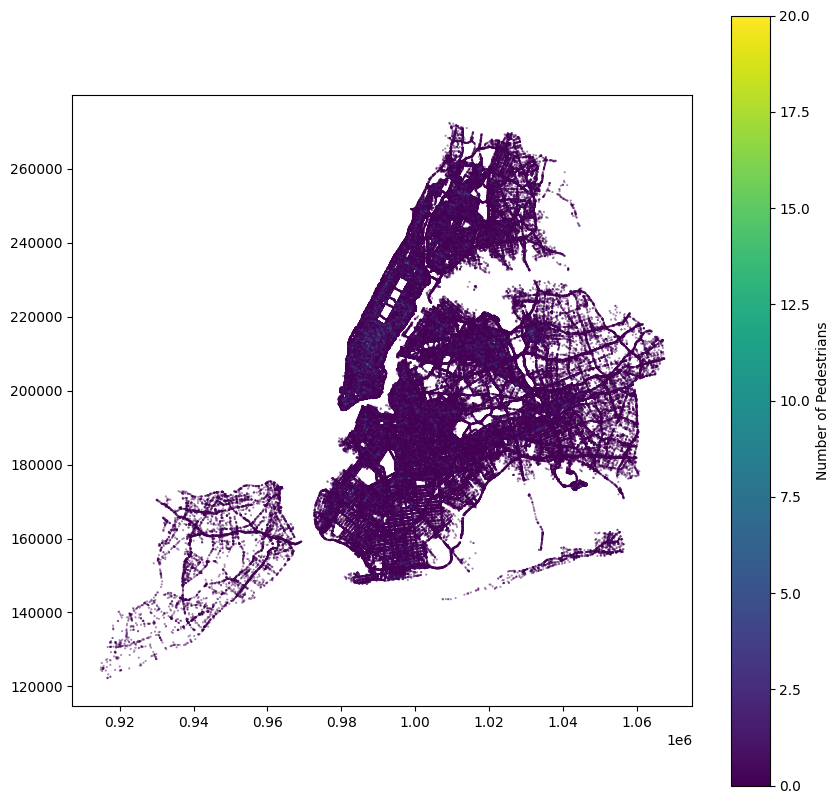

In [11]:
# make simple map with number of pedestrians 
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

working_set.sample(frac=0.1).plot(ax=ax, column='num_pedestrians', legend=True, legend_kwds={'label': "Number of Pedestrians"}, markersize=0.25, alpha=0.5)